# Project: TMDB MOVIE DATA ANALYSIS

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will be analyzing the various movies in The Movie Database (TMDb) which were released between 1960 and 2015.The dataset has the following columns: 
- id: unique TMDb identifier
- imdb_id: unique IMDb identifier 
- popularity: measure of the movie's popularity 
- budget: the budget for the movie's production
- revenue: the revenue from the movie
- original_title: title of the movie
- cast: the list of the casts of the movie
- homepage: address for the movie's website
- director: the director(s) of the movie
- tagline: the movie's tagline
- keywords: the movie's search tags
- overview: the movie's synopsis
- runtime: the total duration of the movie
- genres: the list of the movie's genres
- production_companies: the companies that produced the movie 
- release_date: the date the movie was released
- vote_count: the number of votes the movie got
- vote_average: the average rating for the movie
- release_year: the year the movie was released
- budget_adj: the budget for the movie's production in terms of the 2010 dollars, accounting for inflation over time
- revenue_adj: the revenue from the movie in terms of the 2010 dollars, accounting for inflation over time


The focus of this project will be on answering the following questions:
1. What is the trend of the number of movies released?
2. Which genre is the most popular over the years?
3. Which production company is the most popular based on the popularity of movies produced over the years?
4. Which director is the most popular based on the popularity of movies directed over the years?

In [1]:
# Setting up the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [39]:
# Load data and check for the number of rows and columns
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.shape

(10866, 21)

There are __10,866 rows (movies)__ and __21 columns__ in the dataset.

In [3]:
# Print a few lines of the data to have a glimpse of the dataset
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Certain columns; `cast`, `director`, `genres`, and `production_companies` contain multiple values seperated by pipe(`|`) characters. These multiple values need to be splitted before those columns can be analysed. 

In [4]:
# Check for columns with missing values and wrong data types
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The following columns have missing values: `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `genres`, and `production_companies`. 

Also, `release_date` and `release_year`have the wrong data types.

In [5]:
# Check the summary statistics
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The summary statistics of the numerical columns shows that for:
- `popularity`: most of the movies have a popularity between 0.21 and 0.71 although the highest popularity that a movie has is 32.99.
- `budget`: the average budget for a movie over the years is 14,625,700 USD. An important thing to note in this column is that most of the movies have a budget of 0 USD which is practically impossible, we can therefore assume that this is an error during data collection and thus such should be treated as missing values. 
- `revenue`: the average revenue for a movie over the years is 39,823,320 USD. Similar to the `budget` column, most of the movies have a revenue of 0 USD which is practically impossible, we can also assume that this is an error during data collection and thus such should be treated as missing value. 
- `runtime`: the average runtime for a movie is 102 minutes. Most of the movies have a runtime between 90 and 111 minutes. An important thing to note is that there is/are movie(s) with a runtime of 0 minutes which is practically impossible. We can assume that this is an error during data collection and such should be treated as missing value(s).
- `vote_count`: the average number of votes that a movie gets over the years is 217 votes. Most of the movies have a total number of votes between 17 and 146 votes, though a movie has a total of 9,767 votes, probably it's the same movie that has a popularity of 32.99. 
- `vote_average`: most of the movies have a rating above 5 with the average at 5.97 and the highest rating ever at 9.20.
- `release_year`: most of the movies were released between 1995 and 2011. 
- `budget_adj`: the average budget in terms of 2010 dollars, after accounting for inflation over time is 17,551,040 USD. The assumed error during data collection is also present in this column with most of the movies having a `budget_adj` of 0 USD and such should be treated as missing values. 
- `revenue_adj`: the average revenue in terms of 2010 dollars, after accounting for inflation over time is 51,364,360 USD. The assumed error during data collection is also present in this column with most of the movies having a `revenue_adj` of 0 USD and such should be treated as missing values. 

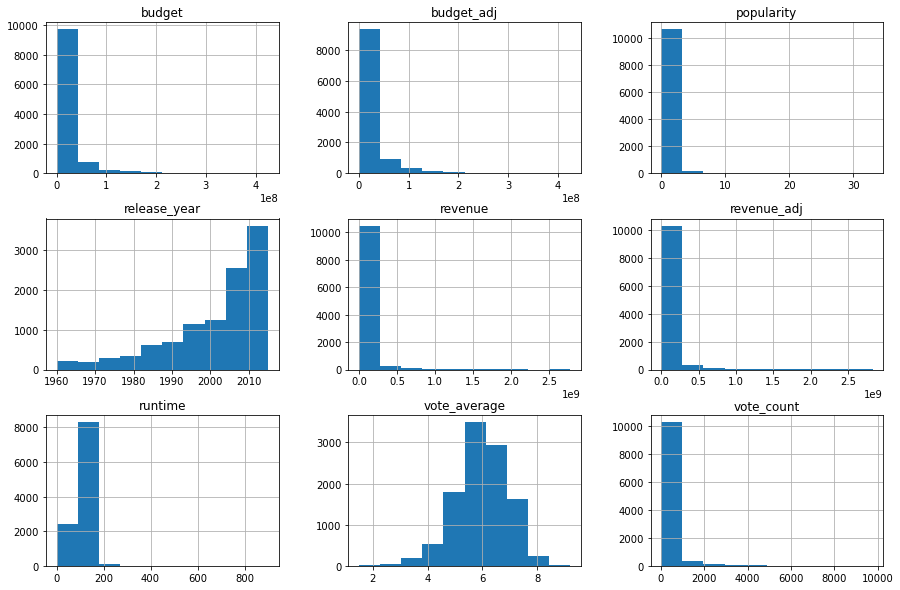

In [3]:
# Univariate plots to visualize the skewness in the data
movie_df.drop('id', axis=1).hist(figsize=(15,10)); # drop the 'id' column, it's not important

- `budget`, `budget_adj`, `revenue`, and `revenue_adj` are skewed to the right with a lot of outliers present. This is probably because of the error during data collection which resulted in most of the rows having an entry of 0 USD.
- `runtime` is skewed to the right with outliers present.
- `popularity` and `vote_count` are both skewed to the right also with outliers present.
- `release_year` is skewed to the left. 
- `vote_average` is normally distributed. 

Let's go ahead to look at the number of rows with their entries as 0 in the following columns: `budget`, `budget_adj`, `revenue`, `revenue_adj` and `runtime`.

In [5]:
# First, define a function that returns the number of rows in a column with their entries as 0
def rows_with_zero(column):
    """
    Returns the number of rows in the column with entries as 0
    """
    return movie_df.query("{} == 0".format(column)).shape[0]

In [6]:
#number of rows in 'budget' column with their entries as 0
rows_with_zero('budget')

5696

There are 5,696 rows with their entries as 0 in the `budget` column.

In [7]:
#number of rows in 'budget_adj' column with their entries as 0
rows_with_zero('budget_adj')

5696

There are 5,696 rows with their entries as 0 in the `budget_adj` column.

In [9]:
#number of rows in 'revenue' column with their entries as 0
rows_with_zero('revenue')

6016

There are 6,016 rows with their entries as 0 in the `revenue` column.

In [10]:
#number of rows in 'revenue_adj' column with their entries as 0
rows_with_zero('revenue_adj')

6016

There are 6,016 rows with their entries as 0 in the `revenue_adj` column.

In [11]:
#number of rows in 'runtime' column with their entries as 0
rows_with_zero('runtime')

31

There are 31 rows with their entries as 0 in the `runtime` column.

Next, visualize the correlation between columns

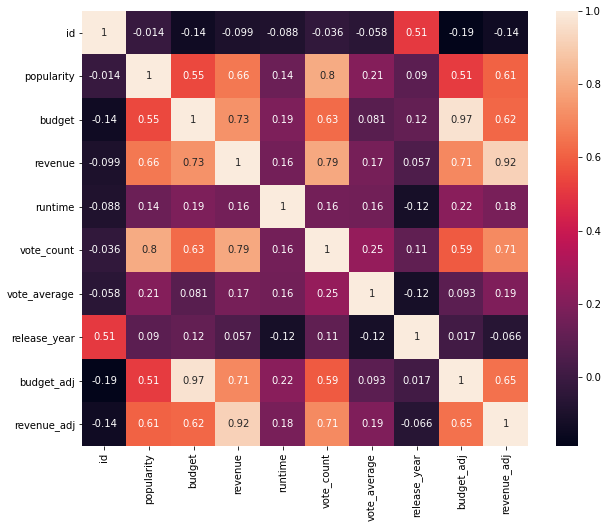

In [4]:
# Visulaize the correlation between coluumns
plt.figure(figsize=(10,8))
sns.heatmap(movie_df.corr(), annot=True);

- `popularity` is positively correlated with `vote_count` *(score of 0.8)*, `revenue`*(score of 0.66)*, `revenue_adj` *(score of 0.61)*, `budget` *(score of 0.55)*, and `budget_adj` *(score of 0.51)*.
- `budget` is positively correlated with `revenue` *(score of 0.73)*, and `vote_count` *(score of 0.63)*.
- `revenue` is also positively correlated with `vote_count` *(score of 0.79)*.

In [6]:
# Check for duplicates
sum(movie_df.duplicated())

1

There is a duplicate in the data

Having explored the structure, shape and distribution of the `movie_df` dataset, let's go ahead to clean the data

### Data Cleaning

**Having discovered the problems with the data, we go ahead to clean the dataset following these steps:**
- Drop columns that are not needed to answer the questions 
- Handle missing data
- Split columns with multiple values
- Drop duplicates
- Handle wrong data types

#### Drop columns that are not needed

In [40]:
# Create a list of the columns that will be dropped
col = ['imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage','tagline', 'keywords', 'overview',
       'runtime', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']

# Drop those columns
movie_df.drop(col, axis=1, inplace=True)

In [41]:
# Confirm that the columns have been dropped
movie_df.head()

,id,popularity,director,genres,production_companies,release_year
0,135397,32.985763,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,76341,28.419936,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015
2,262500,13.112507,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015
3,140607,11.173104,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015
4,168259,9.335014,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015


The columns that are not needed have been dropped. Now, we are left with 6 columns.

#### Handle missing data

In [42]:
# Check for columns that have missing data
movie_df.isnull().sum()

id                         0
popularity                 0
director                  44
genres                    23
production_companies    1030
release_year               0
dtype: int64

`director`, `genres`, and `production_companies` are the columns left with missing data. The missing values would be dropped because the rows in these columns contain multiple values and the missing values are not much compared with the total number of rows. 

In [43]:
# Drop missing rows
movie_df.dropna(inplace=True)

In [44]:
# Confirm the missing data has been dropped
movie_df.isnull().sum()

id                      0
popularity              0
director                0
genres                  0
production_companies    0
release_year            0
dtype: int64

The missing data has been dropped.

In [16]:
# How many rows are left?
movie_df.shape

(9807, 6)

There are __9,807__ rows left.

#### Split columns with multiple values 
We will be using the [Explode function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html) to split these columns

__`director` column__

In [45]:
# Split the column
movie_df = movie_df.assign(director=movie_df['director'].str.split('|')).explode('director')

In [46]:
# confirm the values in the column has been splitted
movie_df.shape

(10749, 6)

There are now __10,749 rows__ confirming that the multiple values in the `director` column have been splitted. 

In [47]:
# How many directors are there?
movie_df['director'].nunique()

4776

There are 4,776 directors.

__`genres` column__

In [48]:
# Split the column
movie_df = movie_df.assign(genres=movie_df['genres'].str.split('|')).explode('genres')

In [49]:
# confirm the values in the column has been splitted
movie_df.head()

,id,popularity,director,genres,production_companies,release_year
0,135397,32.985763,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,2015
0,135397,32.985763,Colin Trevorrow,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015
0,135397,32.985763,Colin Trevorrow,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015
0,135397,32.985763,Colin Trevorrow,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015
1,76341,28.419936,George Miller,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015


The multiple values in the `genres` column have been splitted into new rows. 

In [50]:
# How many genres are there?
movie_df['genres'].nunique()

20

There are 20 genres.

__`production_companies` column__

In [51]:
# Split the column
movie_df = movie_df.assign(production_companies=movie_df['production_companies'].str.split('|')).explode('production_companies')

In [52]:
# confirm the values in the column has been splitted
movie_df.head(10)

,id,popularity,director,genres,production_companies,release_year
0,135397,32.985763,Colin Trevorrow,Action,Universal Studios,2015
0,135397,32.985763,Colin Trevorrow,Action,Amblin Entertainment,2015
0,135397,32.985763,Colin Trevorrow,Action,Legendary Pictures,2015
0,135397,32.985763,Colin Trevorrow,Action,Fuji Television Network,2015
0,135397,32.985763,Colin Trevorrow,Action,Dentsu,2015
0,135397,32.985763,Colin Trevorrow,Adventure,Universal Studios,2015
0,135397,32.985763,Colin Trevorrow,Adventure,Amblin Entertainment,2015
0,135397,32.985763,Colin Trevorrow,Adventure,Legendary Pictures,2015
0,135397,32.985763,Colin Trevorrow,Adventure,Fuji Television Network,2015
0,135397,32.985763,Colin Trevorrow,Adventure,Dentsu,2015


The multiple values in `production_companies` have been splitted into new rows.

In [53]:
# How many production companies are there?
movie_df['production_companies'].nunique()

7863

There are 7,863 production companies.

#### Drop duplicates

In [54]:
# Check for the number of duplicates
sum(movie_df.duplicated())

13

There are 13 duplicates in the new `movie_df` dataset

In [55]:
# drop duplicates
movie_df.drop_duplicates(inplace=True)

In [56]:
# confirm the duplicates have been dropped
sum(movie_df.duplicated())

0

Duplicates in `movie_df` have been droppped.

In [57]:
# check the number of rows in the new dataset
movie_df.shape

(64071, 6)

There are __64,071 rows__ in the new `movie_df` dataset

#### Handle wrong data types

In [58]:
# Check for columns with wrong data type
movie_df.dtypes

id                        int64
popularity              float64
director                 object
genres                   object
production_companies     object
release_year              int64
dtype: object

`release_year` has the wrong data type.

In [59]:
# Change the data type of 'release_year' from integer to string
movie_df['release_year'] = movie_df['release_year'].astype(str)

In [60]:
# Confirm it has been changed
movie_df.dtypes

id                        int64
popularity              float64
director                 object
genres                   object
production_companies     object
release_year             object
dtype: object

It has been changed.

__The dataframe has been cleaned, now we can go on to answer the questions.__

<a id='eda'></a>
## Exploratory Data Analysis

First, define a function to plot charts to avoid repetitive codes.

In [62]:
def custom_plot(df, kind='line'):
    """
    Plots chart based on arguments provided
    
    """
    if kind == 'bar':
        return plt.bar(df.index, df)
    elif kind == 'barh':
        return plt.barh(df.index, df)
    else:
        return plt.plot(df)

The function has been defined, let's go ahead to answer the questions.

### What is the trend of the number of movies released?

In [63]:
# Get the number of movies released for each year
release_trend = movie_df.groupby('release_year')['id'].nunique()

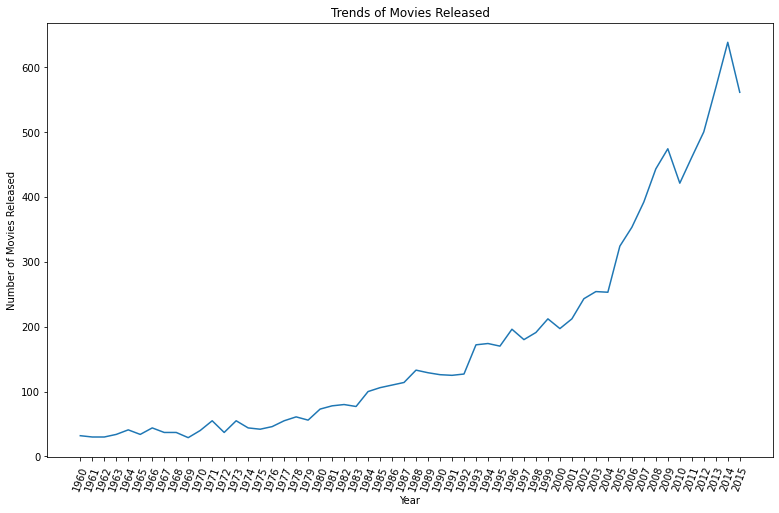

In [65]:
plt.figure(figsize=(13,8))
custom_plot(release_trend)
plt.title('Trends of Movies Released')
plt.xlabel('Year')
plt.xticks(rotation = 70)
plt.ylabel('Number of Movies Released');

There has been an upward trend in the total number of movies released over the years with the peak in 2014. 

### Which genre is the most popular over the years?

In [67]:
# Get the average popularity for each genre over the years
genre = movie_df.groupby('genres')['popularity'].mean().sort_values(ascending=False)

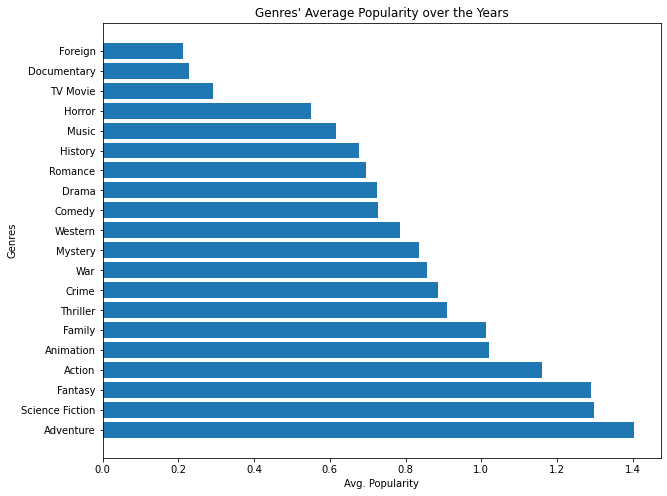

In [68]:
# Visualize the genres' popularity
plt.figure(figsize=(10,8))
custom_plot(genre, 'barh')
plt.title("Genres' Average Popularity over the Years")
plt.xlabel('Avg. Popularity')
plt.ylabel('Genres');

__Adventure__ is the most popular genre over the years.

### Which production company is the most popular based on the popularity of movies produced over the years?

In [69]:
# Get the average popularity for each production company over the years
comp = movie_df.groupby('production_companies')['popularity'].mean()

In [70]:
# Get the top ten values
comp_10 = comp.sort_values(ascending=False).head(10)

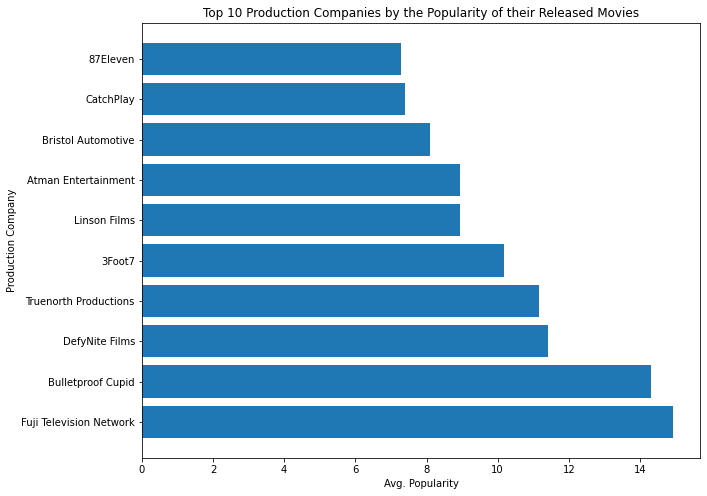

In [73]:
# Visualize the top ten production companies
plt.figure(figsize=(10,8))
custom_plot(comp_10, 'barh')
plt.title("Top 10 Production Companies by the Popularity of their Released Movies")
plt.xlabel('Avg. Popularity')
plt.ylabel('Production Company');

__Fuji Television Network__ is the most popular production company.

### Which director is the most popular based on the popularity of movies directed over the years?

In [74]:
# Get the average popularity for each production company over the years
director = movie_df.groupby('director')['popularity'].mean()

In [75]:
# Get the top ten values
dir_10 = director.sort_values(ascending=False).head(10)

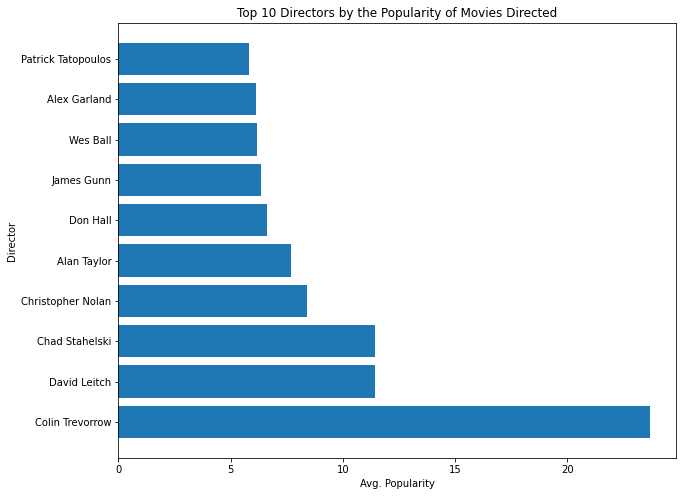

In [76]:
# Visualize the top ten production companies
plt.figure(figsize=(10,8))
custom_plot(dir_10, 'barh')
plt.title("Top 10 Directors by the Popularity of Movies Directed")
plt.xlabel('Avg. Popularity')
plt.ylabel('Director');

__Colin Trevorrow__ is the most popular director.

<a id='conclusions'></a>
## Conclusions

Findings from the analysis of the available data revealed that:
1. There has been an upward trend in the total number of movies released over the years with the peak in 2014. 
2. Adventure is the most popular genre over the years (1960-2015).
3. Fuji Television Network is the most popular production company based on the popularity of movies produced over the years (1960-2015).
4. Colin Trevorrow is the most popular director based on the popularity of movies directed over the years (1960-2015). 

### Limitations
The limitations of this analysis include:

1. The dataset had errors during data collection leading to corrupt/wrong data as evidenced by the rows with their entries as 0 in `budget`, `budget_adj`, `revenue`, `revenue_adj`, and `runtime` columns and this hindered any analysis that probably could have been done using those columns. 
2. There were also instances of missing data in `director`, `genres`, and `production_companies` columns which if that were not the case, the results of this analysis could have been different. 